In [42]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle

dir = 'C:\\Users\\home\\assignment1\\dataset1'

categories = ['forge','real']


data = []


for category in categories:
    path= os.path.join(dir,category)
    label= categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        pet_img=cv2.imread(imgpath,0)
        try:
            pet_img=cv2.resize(pet_img,(50,50))
            image= np.array(pet_img).flatten()
        
            data.append([image,label])
        except Exception as e:
            pass
        
        
        
    
pick_in = open('data1.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()


In [43]:
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

pick_in = open('data1.pickle','rb')
data=pickle.load(pick_in)
pick_in.close()

random.shuffle(data)
features = []  
labels = []

for feature ,label in data:
    features.append(feature)
    labels.append(label)

xtrain, xtest, ytrain,ytest =train_test_split(features,labels, test_size=0.25)

model = SVC(C=1,kernel='poly',gamma='auto')
model.fit(xtrain, ytrain)

pick = open('model.sav','wb')
pickle.dump(model,pick)
pick.close()

Accuracy:  0.8161764705882353
Prediction is :  real
Actual is:  real


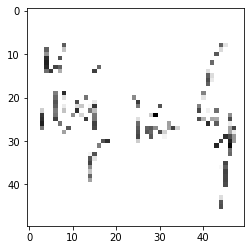

In [47]:
pick = open('model.sav','rb')
model = pickle.load(pick)
pick.close()

prediction=model.predict(xtest)
accuracy = model.score(xtest, ytest)

categories = ['forge','real']

print('Accuracy: ', accuracy)

print('Prediction is : ',categories[prediction[0]])

print('Actual is: ',categories[ytest[0]])


mypet=xtest[0].reshape(50,50)
plt.imshow(mypet,cmap='gray')
plt.show()

In [45]:
from sklearn.metrics import classification_report
print(classification_report(prediction,ytest))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85        84
           1       0.74      0.81      0.77        52

    accuracy                           0.82       136
   macro avg       0.81      0.81      0.81       136
weighted avg       0.82      0.82      0.82       136

